In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('shopping_data.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df = df.iloc[:,3:]
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [6]:
arr = df.values

In [7]:
arr

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

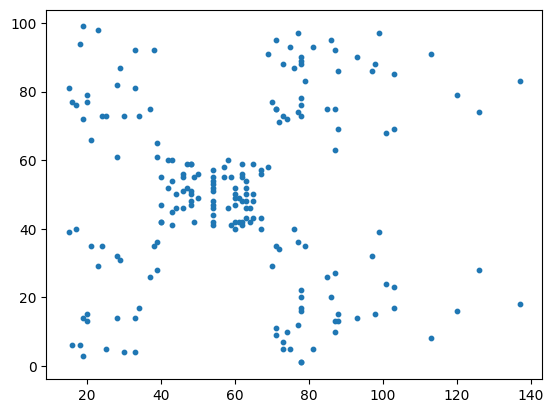

In [16]:
plt.scatter(arr[:,0],arr[:,1], s=10) # s = size of point

In [12]:
# elbow method to find number of optimal cluster
from sklearn.cluster import KMeans
wcss = []
for  i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter=300, n_init=10) # calculate distance from center
    kmeans.fit(arr)
    wcss.append(kmeans.inertia_)
print(wcss)

[269981.2800000001, 183069.17582751293, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37455.98455516028, 30241.343617936585, 25018.576334776335, 22842.004653460128, 19657.783608703958]


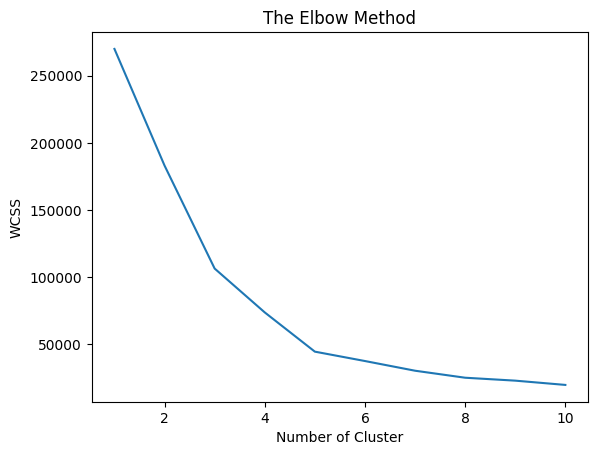

In [13]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

In [14]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=5,min_samples=5)

labels = dbscan.fit_predict(arr)

In [15]:
np.unique(labels) # -1 is for noise

array([-1,  0,  1,  2,  3,  4])

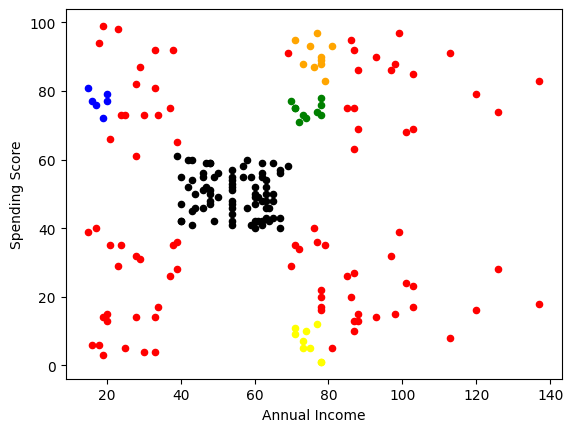

In [17]:
plt.scatter(arr[labels == -1,0],arr[labels == -1,1], s=20, color = 'red')


plt.scatter(arr[labels == 0,0],arr[labels == 0,1], s=20, color = 'blue')
plt.scatter(arr[labels == 1,0],arr[labels == 1,1], s=20, color = 'black')
plt.scatter(arr[labels == 2,0],arr[labels == 2,1], s=20, color = 'green')
plt.scatter(arr[labels == 3,0],arr[labels == 3,1], s=20, color = 'yellow')
plt.scatter(arr[labels == 4,0],arr[labels == 4,1], s=20, color = 'orange')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

